In [204]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

In [205]:
np.random.binomial(1,0.5,10)

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [208]:
n_trials = 100
data =  list(np.random.binomial(1,0.75,n_trials//4)) + list(np.random.binomial(1,0.1,n_trials//4)) + list(np.random.binomial(1,0.9,n_trials//4))+ list(np.random.binomial(1,0.5,n_trials//4))

In [209]:
# a--> b <--> non-a ou b

In [210]:
# Création de l'échantillon des valeurs
x = np.linspace(0, 1, 1000)

In [267]:
def simple_dirichlet_change_detection(data, alpha=1, display=False):
    if display:
        plt.figure(figsize=(30,100))
    
    beta_ = {}
    count = {}
    mem_choice = []
    mem_q = []
    lik = {}
    diri = {}
    n = 0
    K = 0
    for i, obs in enumerate(data):
        z = 0
        for k in range(K):
            diri[k] = count[k] / (n + alpha)
            q = beta.rvs(beta_[k][1], beta_[k][0])
            lik[k] = q * obs + (1-q) * (1-obs)
            z += diri[k] * lik[k]
        diri[K] = alpha / (n + alpha)
        q = beta.rvs(1,1)
        lik[K] = q * obs + (1-q) * (1-obs)
        z += diri[K] * lik[K]
        p = np.zeros(K+1)
        for k in range(K+1):
            p[k] = diri[k] * lik[k] / z
        choice = np.random.choice(list(range(K+1)), p=p)
        mem_choice += [choice]
        
        if choice == K:
            K += 1
            beta_[choice] = {0:1, 1:1}
            count[choice] = 0               
        count[choice] += 1
        beta_[choice][obs] += 1
        mem_q +=  [beta.mean(beta_[choice][1], beta_[choice][0])]
        n += 1
             
        if display:
            ax = plt.subplot(25,5,i+1)

            #print(p, choice)
            for k in range(K):
                pdf = beta.pdf(x, beta_[k][1], beta_[k][0])
                ax.plot(x, pdf, label=f'{k}')
            ax.set_title(f'Observation #{i+1}')#, overlap={overlap_prob:.2f}')
            ax.text(0.05,4.5,f'obs={obs}')
            ax.text(0.05,4.1,f'Choice={choice}')
            ax.set_ylim(0,5)
            ax.set_xlim(0,1)
            plt.legend(loc=1)
    return beta_, count, mem_choice, mem_q

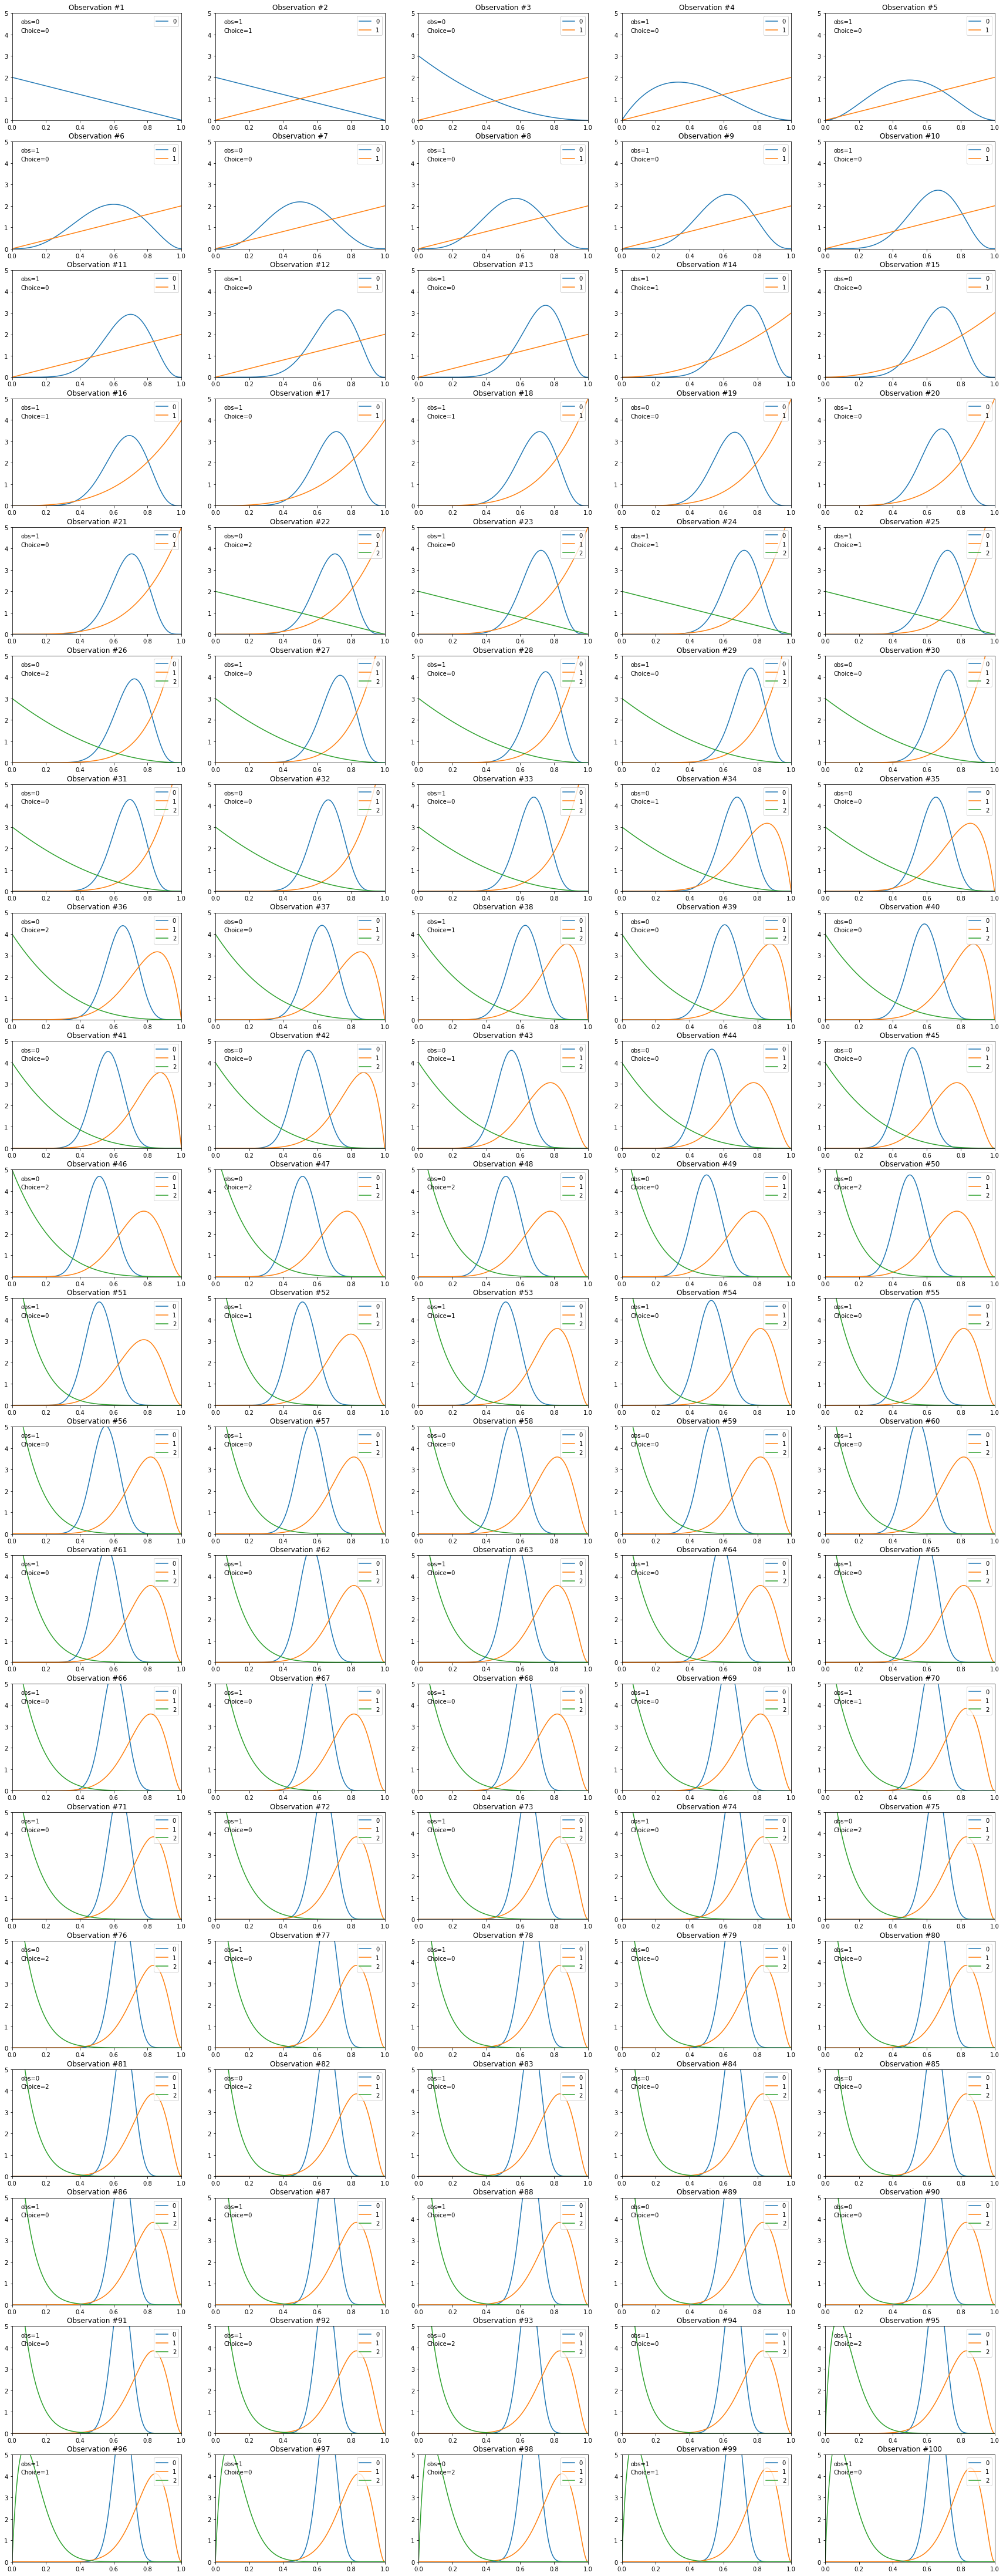

In [268]:
beta_, count, mem_choice, mem_q = simple_dirichlet_change_detection(data, display=True)

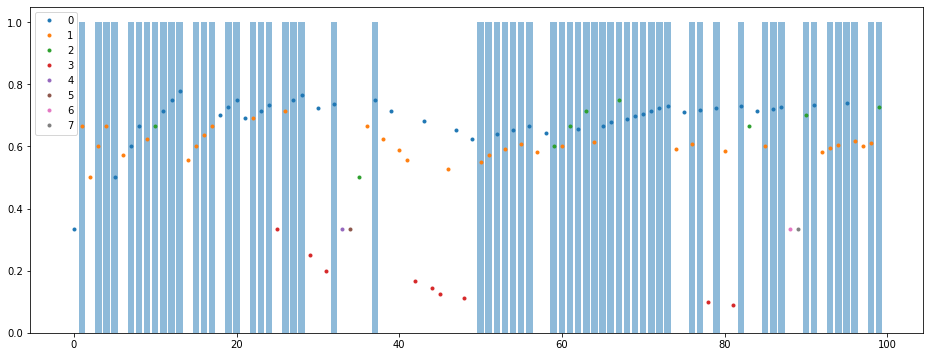

In [213]:
plt.figure(figsize=(16,6))
plt.bar(range(len(data)),data, alpha=.5)
for k in range(len(beta_)):
    axe = np.where(np.array(mem_choice) == k)[0]
    plt.plot(axe, np.array(mem_q)[axe],'.', label=k)
plt.legend()

In [238]:
def vol_dirichlet_change_detection(data, alpha=10, v = 0.25, display=False):
    if display:
        plt.figure(figsize=(30,100))
    
    beta_ = {}
    count = {}
    mem_choice = []
    mem_q = []
    lik = {}
    diri = {}
    n = 0
    K = 0
    choice = 0
    for i, obs in enumerate(data):
        z = 0
        for k in range(K):
            diri[k] = count[k] / (n + alpha)
            q = beta.rvs(beta_[k][1], beta_[k][0])
            lik[k] = q * obs + (1-q) * (1-obs)
            if choice == k:
                z += (1 - v) * diri[k] * lik[k]
            else:
                z += v / (K+1) * diri[k] * lik[k]
        diri[K] = alpha / (n + alpha)
        q = beta.rvs(1,1)
        lik[K] = q * obs + (1-q) * (1-obs)
        if choice == K:
            z += (1 - v) * diri[K] * lik[K]
        else:
            z += v / (K+1) * diri[K] * lik[K]
        p = np.zeros(K+1)
        for k in range(K+1):
            if choice == k:
                p[k] = (1 - v) * diri[k] * lik[k] / z
            else:
                p[k] = v / (K+1) * diri[k] * lik[k] / z
        #print(p)
        choice = np.random.choice(list(range(K+1)), p=p)
        mem_choice += [choice]
        if choice == K:
            K += 1
            beta_[choice] = {0:1, 1:1}
            count[choice] = 0               
        count[choice] += 1
        beta_[choice][obs] += 1
        mem_q +=  [beta.mean(beta_[choice][1], beta_[choice][0])]
        n += 1
             
        if display:
            ax = plt.subplot(25,5,i+1)
        
            #print(p, choice)
            for k in range(K):
                pdf = beta.pdf(x, beta_[k][1], beta_[k][0])
                ax.plot(x, pdf, label=f'{k}')
            ax.set_title(f'Observation #{i+1}')#, overlap={overlap_prob:.2f}')
            ax.text(0.05,4.5,f'obs={obs}')
            ax.text(0.05,4.1,f'Choice={choice}')
            ax.set_ylim(0,5)
            ax.set_xlim(0,1)
            plt.legend(loc=1)
    return beta_, count, mem_choice, mem_q

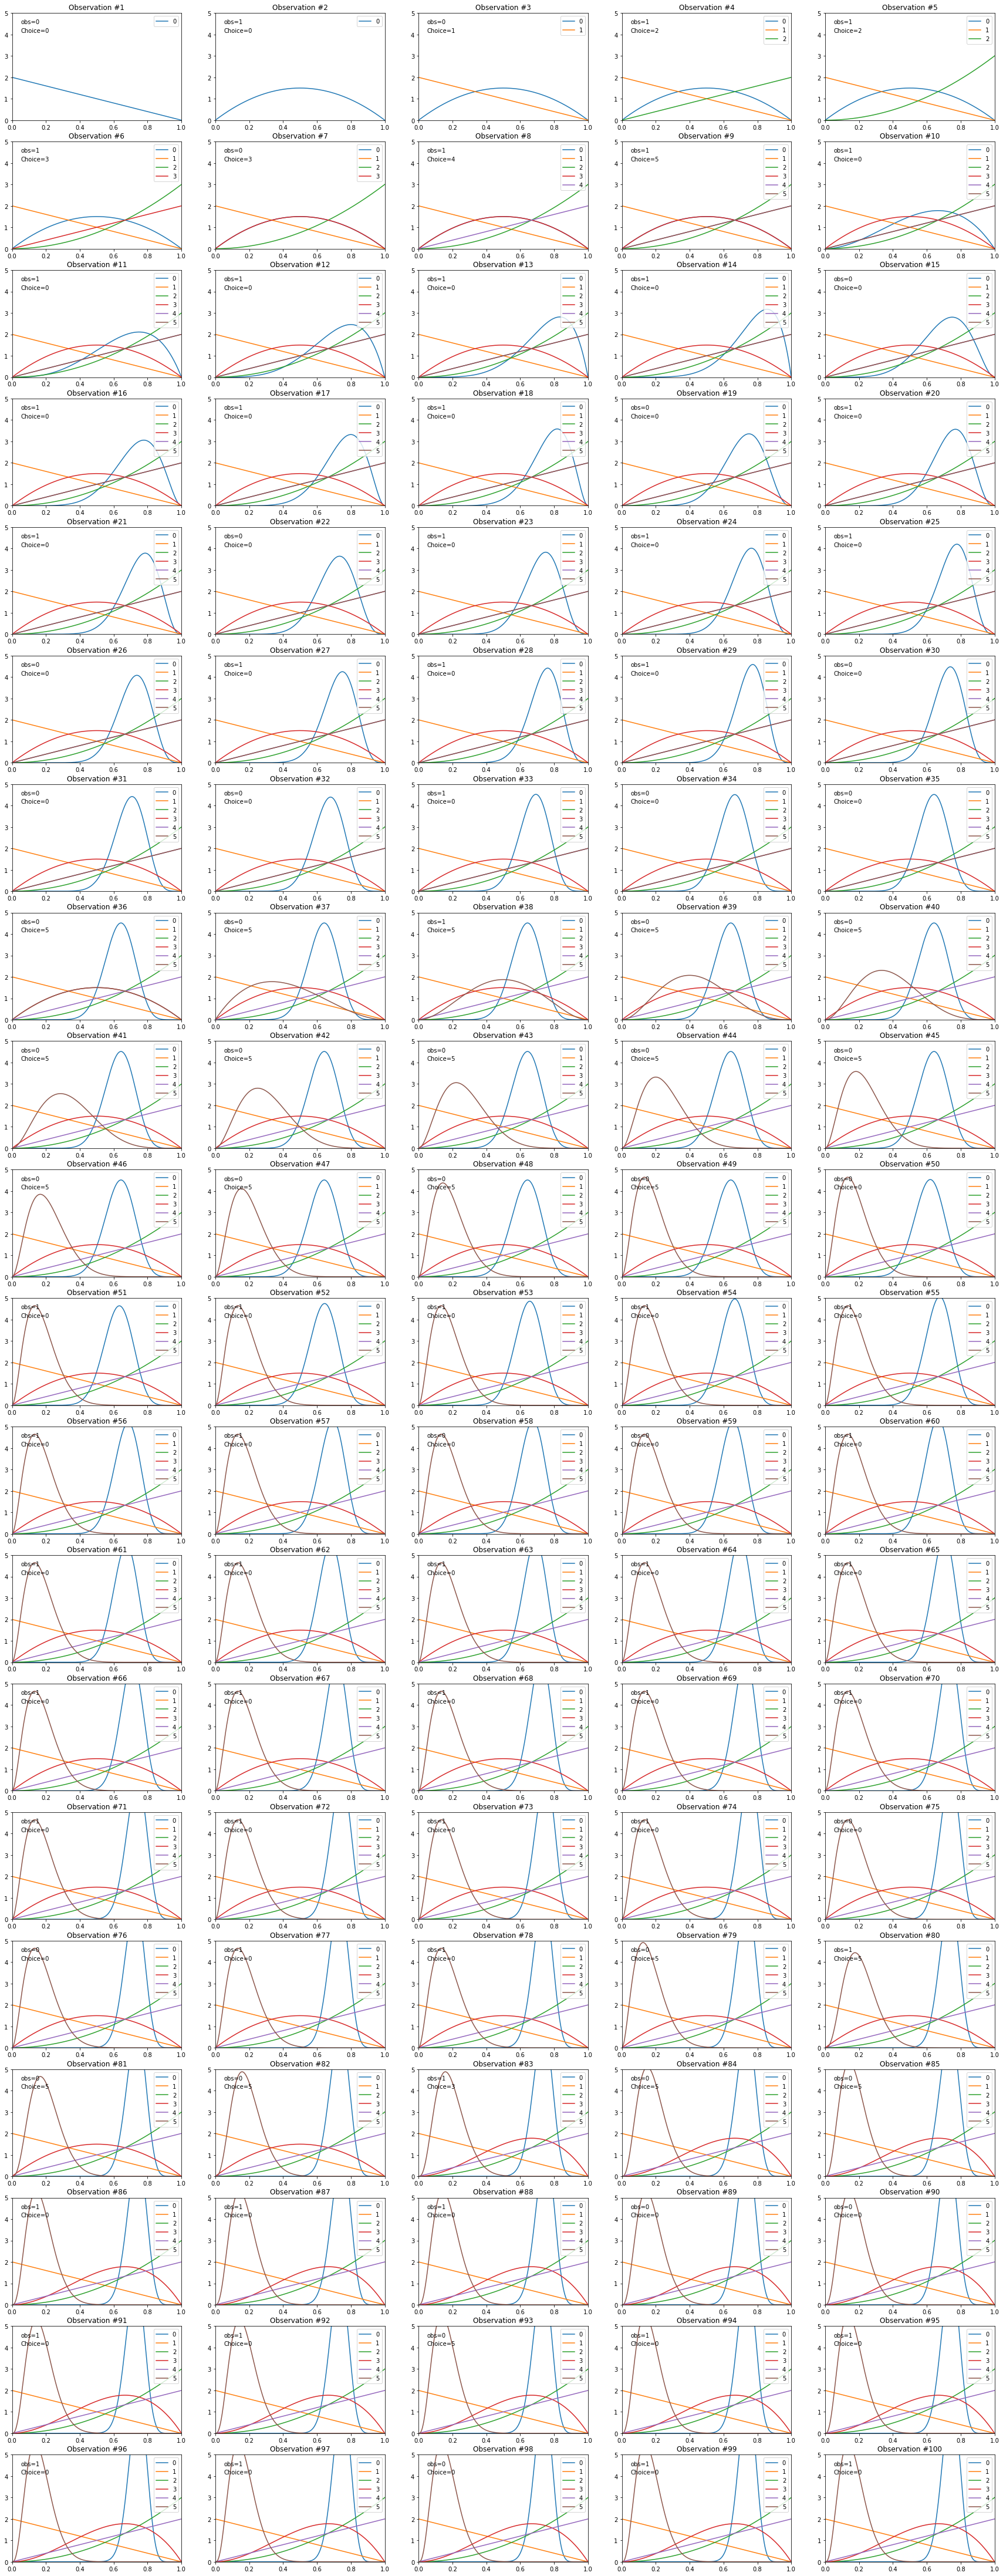

In [215]:
beta_, count, mem_choice, mem_q = vol_dirichlet_change_detection(data)

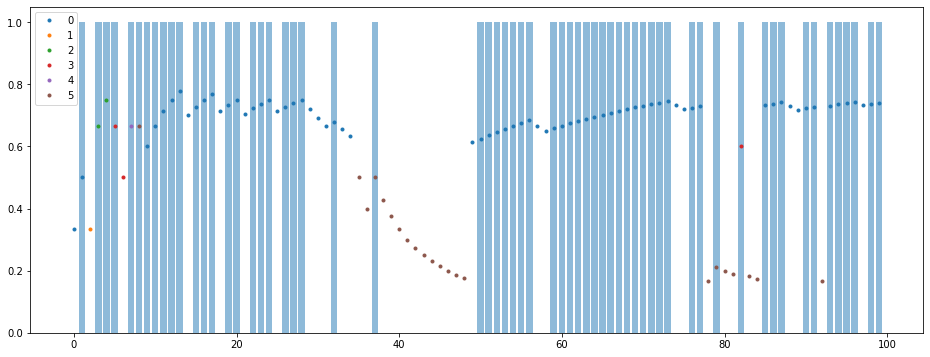

In [216]:
plt.figure(figsize=(16,6))
plt.bar(range(len(data)),data, alpha=.5)
for k in range(len(beta_)):
    axe = np.where(np.array(mem_choice) == k)[0]
    plt.plot(axe, np.array(mem_q)[axe],'.', label=k)
plt.legend()

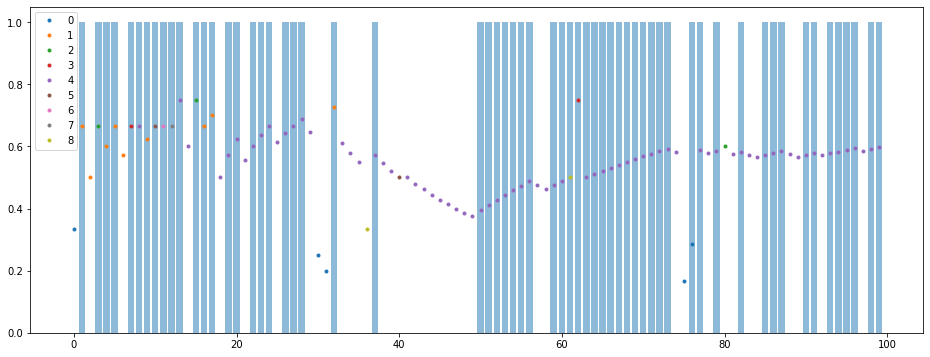

In [255]:
beta_, count, mem_choice, mem_q = vol_dirichlet_change_detection(data, v=0.5)
plt.figure(figsize=(16,6))
plt.bar(range(len(data)),data, alpha=.5)
for k in range(len(beta_)):
    axe = np.where(np.array(mem_choice) == k)[0]
    plt.plot(axe, np.array(mem_q)[axe],'.', label=k)
plt.legend()

In [228]:
def simple_vol_change_detection(data, v = 0.1, display=False):
    if display:
        plt.figure(figsize=(30,100))
    
    beta_ = {}
    count = {}
    mem_choice = []
    mem_q = []
    lik = {}
    diri = {}
    n = 0
    K = 0
    choice = 0
    for i, obs in enumerate(data):
        z = 0
        for k in range(K):
            diri[k] = 1
            q = beta.rvs(beta_[k][1], beta_[k][0])
            lik[k] = q * obs + (1-q) * (1-obs)
            if choice == k:
                z += (1 - v) * diri[k] * lik[k]
            else:
                z += v / (K+1) * diri[k] * lik[k]
        diri[K] = 1
        q = beta.rvs(1, 1)
        lik[K] = q * obs + (1-q) * (1-obs)
        if choice == K:
            z += (1 - v) * diri[K] * lik[K]
        else:
            z += v / (K+1) * diri[K] * lik[K]
        p = np.zeros(K+1)
        for k in range(K+1):
            if choice == k:
                p[k] = (1 - v) * diri[k] * lik[k] / z
            else:
                p[k] = v / (K+1) * diri[k] * lik[k] / z
        print(p)
        choice = np.random.choice(list(range(K+1)), p=p)
        mem_choice += [choice]
        if choice == K:
            K += 1
            beta_[choice] = {0:1, 1:1}
            count[choice] = 0               
        count[choice] += 1
        beta_[choice][obs] += 1
        mem_q +=  [beta.mean(beta_[choice][1], beta_[choice][0])]
        n += 1
             
        if display:
            ax = plt.subplot(25,5,i+1)

            #print(p, choice)
            for k in range(K):
                pdf = beta.pdf(x, beta_[k][1], beta_[k][0])
                ax.plot(x, pdf, label=f'{k}')
            ax.set_title(f'Observation #{i+1}')#, overlap={overlap_prob:.2f}')
            ax.text(0.05,4.5,f'obs={obs}')
            ax.text(0.05,4.1,f'Choice={choice}')
            ax.set_ylim(0,5)
            ax.set_xlim(0,1)
            plt.legend(loc=1)
    return beta_, count, mem_choice, mem_q

In [269]:
beta_, count, mem_choice, mem_q = simple_vol_change_detection(data)

[1.]
[0.90200493 0.09799507]
[0.97960938 0.02039062]
[0.88920062 0.11079938]
[0.98465642 0.01534358]
[0.95017361 0.04982639]
[0.96098583 0.03901417]
[0.92684416 0.07315584]
[0.96148033 0.03851967]
[0.96181346 0.03818654]
[0.94940046 0.05059954]
[0.90703908 0.09296092]
[0.97996608 0.02003392]
[0.02225392 0.95593169 0.0218144 ]
[0.13501951 0.83291781 0.03206268]
[0.05820418 0.9026134  0.03918242]
[0.02094406 0.01996033 0.95181179 0.00728381]
[0.0222855  0.02891719 0.93310974 0.01568757]
[0.09699855 0.10011818 0.70026099 0.10262227]
[0.01743856 0.02061006 0.93118324 0.03076814]
[0.0279323  0.01858298 0.93729771 0.01618701]
[0.13871244 0.55721447 0.08887603 0.21519706]
[0.02745309 0.01031183 0.93995469 0.02228039]
[0.0348951  0.02830059 0.90671782 0.03008649]
[0.02861822 0.02723811 0.93050852 0.01363515]
[0.04529288 0.08446113 0.07855752 0.70442821 0.08726026]
[0.0483337  0.03164829 0.03137379 0.83963111 0.04901311]
[0.01829267 0.0220162  0.02079862 0.9127006  0.02619191]
[0.02179322 0.023

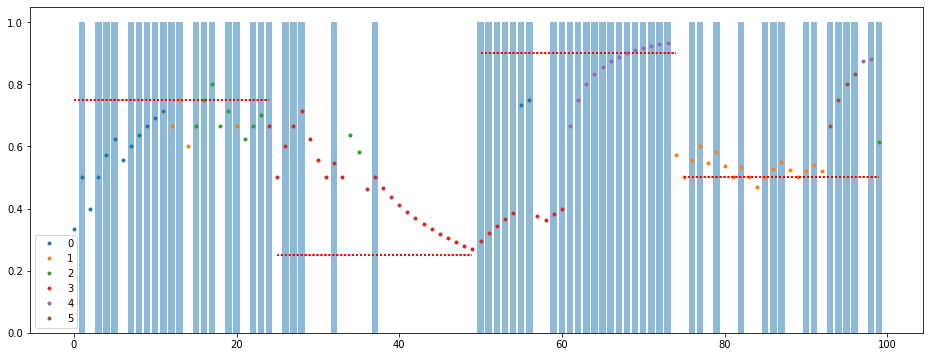

In [270]:
plt.figure(figsize=(16,6))
plt.bar(range(len(data)),data, alpha=.5)
for k in range(len(beta_)):
    axe = np.where(np.array(mem_choice) == k)[0]
    plt.plot(axe, np.array(mem_q)[axe],'.', label=k)
    plt.plot([0,24],[.75,.75],'r:')
    plt.plot([25,49],[.25,.25],'r:')
    plt.plot([50,74],[.9,.9],'r:')
    plt.plot([75,99],[.5,.5],'r:')
plt.legend()


[1.]
[0.6501737 0.3498263]
[0.97742666 0.02257334]
[0.91915274 0.08084726]
[0.91267856 0.08732144]
[0.96857148 0.03142852]
[0.89316786 0.10683214]
[0.97448891 0.02551109]
[0.9717602 0.0282398]
[0.02002831 0.95833348 0.02163821]
[0.93874828 0.03446892 0.0267828 ]
[0.95845833 0.01147056 0.03007111]
[0.9611946  0.02593638 0.01286903]
[0.95959339 0.0343018  0.00610482]
[0.83088674 0.0619443  0.10716896]
[0.08087969 0.83886614 0.08025417]
[0.03837218 0.95348272 0.0081451 ]
[0.0342927  0.95311879 0.0125885 ]
[0.05500911 0.9154894  0.0295015 ]
[0.0268201  0.94007973 0.03310017]
[0.02785077 0.0268997  0.91688366 0.02836586]
[0.00576084 0.01441159 0.97000605 0.00982152]
[0.04015077 0.02651242 0.89275885 0.04057796]
[0.02363656 0.02896157 0.93577248 0.01162939]
[0.02025936 0.01915612 0.93662231 0.02396221]
[0.0172924  0.01618535 0.91894756 0.04757469]
[0.02078758 0.01809124 0.93261293 0.02850825]
[0.02264216 0.02066393 0.93495827 0.02173564]
[2.50296054e-02 2.15304202e-02 9.52792829e-01 6.471456

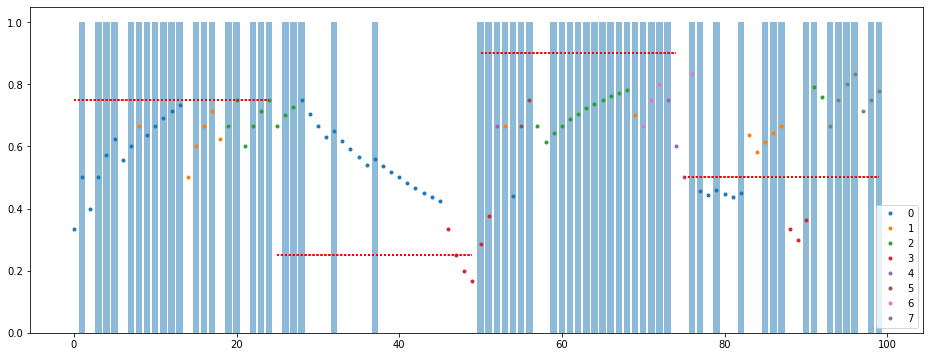

In [273]:
beta_, count, mem_choice, mem_q = simple_vol_change_detection(data)
plt.figure(figsize=(16,6))
plt.bar(range(len(data)),data, alpha=.5)
for k in range(len(beta_)):
    axe = np.where(np.array(mem_choice) == k)[0]
    plt.plot(axe, np.array(mem_q)[axe],'.', label=k)
    plt.plot([0,24],[.75,.75],'r:')
    plt.plot([25,49],[.25,.25],'r:')
    plt.plot([50,74],[.9,.9],'r:')
    plt.plot([75,99],[.5,.5],'r:')
plt.legend()


[1.]
[0.92651198 0.07348802]
[0.74677738 0.25322262]
[0.97528677 0.02471323]
[0.99208174 0.00791826]
[0.99331739 0.00668261]
[0.9038911 0.0961089]
[0.82229982 0.17770018]
[0.9787848 0.0212152]
[0.928285 0.071715]
[0.95354489 0.04645511]
[0.92601516 0.07398484]
[9.99771108e-01 2.28891914e-04]
[0.97614053 0.02385947]
[0.91174716 0.08825284]
[0.97147875 0.02852125]
[0.93971903 0.06028097]
[0.9616122 0.0383878]
[0.9204817 0.0795183]
[0.99378788 0.00621212]
[0.9918935 0.0081065]
[0.72962224 0.27037776]
[0.09652742 0.84545971 0.05801287]
[0.09967679 0.78889331 0.1114299 ]
[0.03248031 0.96247168 0.00504801]
[0.02572244 0.91018515 0.06409242]
[0.05421742 0.91968034 0.02610225]
[0.94240522 0.03146016 0.02613462]
[0.96150181 0.02376586 0.01473233]
[0.88727245 0.05090468 0.06182287]
[0.84455281 0.07579218 0.07965501]
[0.8787067 0.0446747 0.0766186]
[0.97469918 0.01915112 0.0061497 ]
[0.9454073  0.01462217 0.03997052]
[0.87400636 0.09164061 0.03435302]
[0.8960483  0.06215595 0.04179575]
[0.8965758

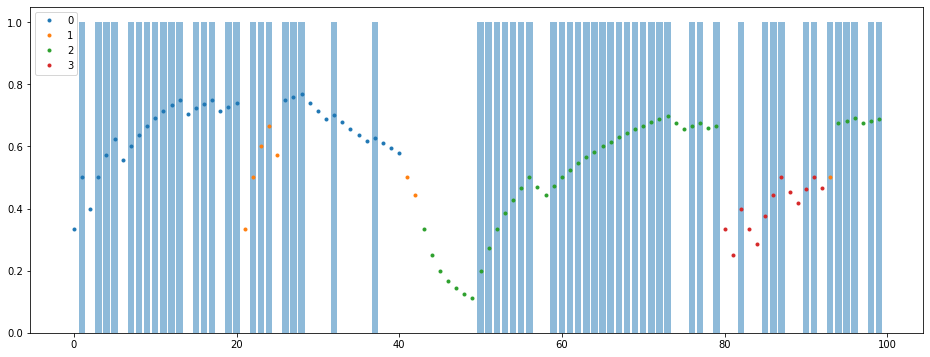

In [280]:
beta_, count, mem_choice, mem_q = simple_vol_change_detection(data, v=0.1)
plt.figure(figsize=(16,6))
plt.bar(range(len(data)),data, alpha=.5)
for k in range(len(beta_)):
    axe = np.where(np.array(mem_choice) == k)[0]
    plt.plot(axe, np.array(mem_q)[axe],'.', label=k)
plt.legend()

[1.]
[0.93519664 0.06480336]
[0.93739853 0.06260147]
[0.98564074 0.01435926]
[0.88029329 0.11970671]
[0.85969044 0.14030956]
[0.76415273 0.23584727]
[0.99573697 0.00426303]
[0.87326962 0.12673038]
[0.88740541 0.11259459]
[0.93225649 0.06774351]
[0.88056737 0.11943263]
[0.99531711 0.00468289]
[0.87527612 0.12472388]
[0.7964406 0.2035594]
[0.34284031 0.1372215  0.51993819]
[0.15377132 0.71409729 0.13213139]
[0.05152188 0.05351991 0.85175792 0.04320029]
[0.10303951 0.20533521 0.35263923 0.33898604]
[0.19569439 0.27559129 0.21201668 0.26366076 0.05303688]
[0.04667121 0.04138112 0.89101345 0.00350814 0.01742608]
[0.1064796  0.06610427 0.71227639 0.06701979 0.04811996]
[0.04770594 0.01106192 0.8419249  0.05085482 0.04845242]
[0.0565047  0.04104778 0.03134759 0.84597576 0.02512417]
[0.0466582  0.01426596 0.04841364 0.86414937 0.02651283]
[0.02016046 0.02370542 0.04783485 0.87673591 0.03156336]
[0.06888547 0.05494819 0.07798925 0.75762611 0.04055098]
[0.04748242 0.01765919 0.03587904 0.8699567

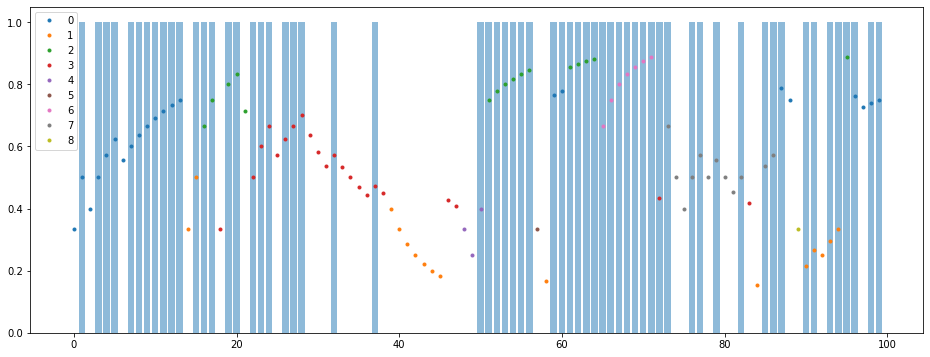

In [231]:
beta_, count, mem_choice, mem_q = simple_vol_change_detection(data, v=0.2)
plt.figure(figsize=(16,6))
plt.bar(range(len(data)),data, alpha=.5)
for k in range(len(beta_)):
    axe = np.where(np.array(mem_choice) == k)[0]
    plt.plot(axe, np.array(mem_q)[axe],'.', label=k)
plt.legend()

In [232]:
def simple_vol_change_detection_mean(data, v = 0.1, display=False):
    if display:
        plt.figure(figsize=(30,100))
    
    beta_ = {}
    count = {}
    mem_choice = []
    mem_q = []
    lik = {}
    diri = {}
    n = 0
    K = 0
    choice = 0
    for i, obs in enumerate(data):
        z = 0
        for k in range(K):
            diri[k] = 1
            q = beta.mean(beta_[k][1], beta_[k][0])
            lik[k] = q * obs + (1-q) * (1-obs)
            if choice == k:
                z += (1 - v) * diri[k] * lik[k]
            else:
                z += v / (K+1) * diri[k] * lik[k]
        diri[K] = 1
        q = beta.mean(1, 1)
        lik[K] = q * obs + (1-q) * (1-obs)
        if choice == K:
            z += (1 - v) * diri[K] * lik[K]
        else:
            z += v / (K+1) * diri[K] * lik[K]
        p = np.zeros(K+1)
        for k in range(K+1):
            if choice == k:
                p[k] = (1 - v) * diri[k] * lik[k] / z
            else:
                p[k] = v / (K+1) * diri[k] * lik[k] / z
        print(p)
        choice = np.random.choice(list(range(K+1)), p=p)
        mem_choice += [choice]
        if choice == K:
            K += 1
            beta_[choice] = {0:1, 1:1}
            count[choice] = 0               
        count[choice] += 1
        beta_[choice][obs] += 1
        mem_q +=  [beta.mean(beta_[choice][1], beta_[choice][0])]
        n += 1
             
        if display:
            ax = plt.subplot(25,5,i+1)

            #print(p, choice)
            for k in range(K):
                pdf = beta.pdf(x, beta_[k][1], beta_[k][0])
                ax.plot(x, pdf, label=f'{k}')
            ax.set_title(f'Observation #{i+1}')#, overlap={overlap_prob:.2f}')
            ax.text(0.05,4.5,f'obs={obs}')
            ax.text(0.05,4.1,f'Choice={choice}')
            ax.set_ylim(0,5)
            ax.set_xlim(0,1)
            plt.legend(loc=1)
    return beta_, count, mem_choice, mem_q

[1.]
[0.92307692 0.07692308]
[0.94736842 0.05263158]
[0.93506494 0.06493506]
[0.94736842 0.05263158]
[0.95364238 0.04635762]
[0.04316547 0.90647482 0.05035971]
[0.03921569 0.92647059 0.03431373]
[0.03308519 0.93796526 0.02894955]
[0.02996255 0.94382022 0.02621723]
[0.02807018 0.94736842 0.0245614 ]
[0.02680067 0.94974874 0.02345059]
[0.02588997 0.95145631 0.02265372]
[0.02520479 0.95274102 0.02205419]
[0.07341491 0.84093437 0.08565072]
[0.02680067 0.94974874 0.02345059]
[0.02616352 0.9509434  0.02289308]
[0.02564103 0.95192308 0.0224359 ]
[0.06772009 0.85327314 0.07900677]
[0.02680067 0.94974874 0.02345059]
[0.0263107  0.95066744 0.02302186]
[0.06185567 0.86597938 0.07216495]
[0.0272548  0.94889726 0.02384795]
[0.02680067 0.94974874 0.02345059]
[0.02640264 0.95049505 0.02310231]
[0.93205479 0.02191781 0.0460274 ]
[0.92240117 0.04685212 0.03074671]
[0.92773384 0.0436324  0.02863376]
[0.9315808  0.04130971 0.02710949]
[0.92420538 0.02444988 0.05134474]
[0.04066543 0.89833641 0.06099815]


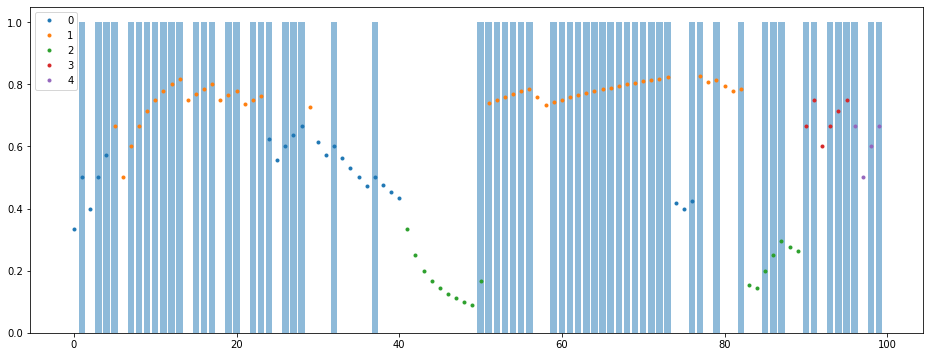

In [233]:
beta_, count, mem_choice, mem_q = simple_vol_change_detection_mean(data, v=0.1)
plt.figure(figsize=(16,6))
plt.bar(range(len(data)),data, alpha=.5)
for k in range(len(beta_)):
    axe = np.where(np.array(mem_choice) == k)[0]
    plt.plot(axe, np.array(mem_q)[axe],'.', label=k)
plt.legend()

In [281]:
def simple_vol_change_detection_leak(data, v = 0.1, display=False, leak=0.95):
    if display:
        plt.figure(figsize=(30,100))
    
    beta_ = {}
    count = {}
    mem_choice = []
    mem_q = []
    lik = {}
    diri = {}
    n = 0
    K = 0
    choice = 0
    for i, obs in enumerate(data):
        z = 0
        for k in range(K):
            diri[k] = 1
            beta_[k][1] *= leak
            beta_[k][0] *= leak
            q = beta.rvs(beta_[k][1], beta_[k][0])
            lik[k] = q * obs + (1-q) * (1-obs)
            if choice == k:
                z += (1 - v) * diri[k] * lik[k]
            else:
                z += v / (K+1) * diri[k] * lik[k]
        diri[K] = 1
        q = beta.rvs(1, 1)
        lik[K] = q * obs + (1-q) * (1-obs)
        if choice == K:
            z += (1 - v) * diri[K] * lik[K]
        else:
            z += v / (K+1) * diri[K] * lik[K]
        p = np.zeros(K+1)
        for k in range(K+1):
            if choice == k:
                p[k] = (1 - v) * diri[k] * lik[k] / z
            else:
                p[k] = v / (K+1) * diri[k] * lik[k] / z
        print(p)
        choice = np.random.choice(list(range(K+1)), p=p)
        mem_choice += [choice]
        if choice == K:
            K += 1
            beta_[choice] = {0:1, 1:1}
            count[choice] = 0               
        count[choice] += 1
        beta_[choice][obs] += 1
        mem_q +=  [beta.mean(beta_[choice][1], beta_[choice][0])]
        n += 1
             
        if display:
            ax = plt.subplot(25,5,i+1)

            #print(p, choice)
            for k in range(K):
                pdf = beta.pdf(x, beta_[k][1], beta_[k][0])
                ax.plot(x, pdf, label=f'{k}')
            ax.set_title(f'Observation #{i+1}')#, overlap={overlap_prob:.2f}')
            ax.text(0.05,4.5,f'obs={obs}')
            ax.text(0.05,4.1,f'Choice={choice}')
            ax.set_ylim(0,5)
            ax.set_xlim(0,1)
            plt.legend(loc=1)
    return beta_, count, mem_choice, mem_q

[1.]
[0.8975899 0.1024101]
[0.85939883 0.14060117]
[0.95811547 0.04188453]
[0.94292804 0.05707196]
[0.90624053 0.09375947]
[0.97062523 0.02937477]
[0.960874 0.039126]
[0.93745094 0.06254906]
[0.93171769 0.06828231]
[0.99373226 0.00626774]
[0.95312762 0.04687238]
[0.98581494 0.01418506]
[0.9232218 0.0767782]
[0.83502804 0.16497196]
[0.93966159 0.06033841]
[9.99841776e-01 1.58223577e-04]
[0.95460775 0.04539225]
[0.96113222 0.03886778]
[0.94175318 0.05824682]
[0.94795545 0.05204455]
[0.90313048 0.09686952]
[0.98523245 0.01476755]
[0.97505882 0.02494118]
[0.990226 0.009774]
[0.84427642 0.15572358]
[0.07675821 0.85793668 0.06530511]
[0.03076564 0.94281251 0.02642185]
[0.03615007 0.9398877  0.02396223]
[0.06436372 0.74519451 0.19044177]
[0.0278743  0.96505727 0.00706843]
[0.05971973 0.84594434 0.09433593]
[0.04314578 0.92723891 0.02961531]
[0.03103574 0.91722382 0.05174044]
[0.01363338 0.96693267 0.01943395]
[0.01440253 0.92326976 0.06232771]
[0.01623592 0.97507179 0.00869229]
[4.86436026e-0

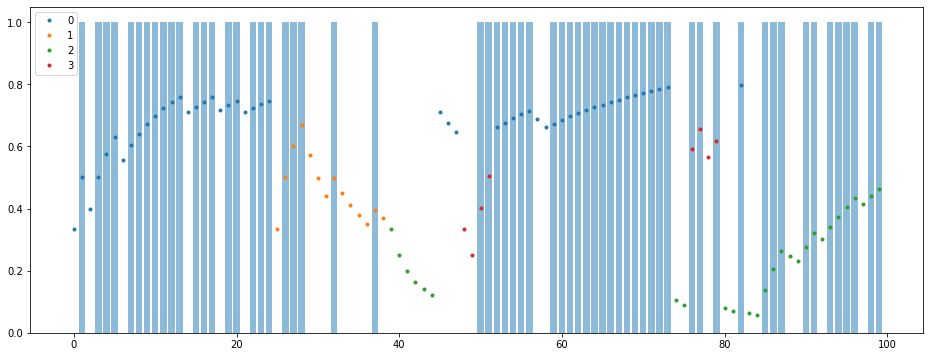

In [287]:
beta_, count, mem_choice, mem_q = simple_vol_change_detection_leak(data, v=0.1, leak=0.99)
plt.figure(figsize=(16,6))
plt.bar(range(len(data)),data, alpha=.5)
for k in range(len(beta_)):
    axe = np.where(np.array(mem_choice) == k)[0]
    plt.plot(axe, np.array(mem_q)[axe],'.', label=k)
plt.legend()

In [288]:
beta_

{0: {0: 5.913765707354719, 1: 23.160536921314524},
 1: {0: 5.083906408819533, 1: 2.9766171133122477},
 2: {0: 12.56170773180096, 1: 10.8294355010874},
 3: {0: 2.6126459482911177, 1: 4.240515197721247}}

[1.]
[0.85584272 0.14415728]
[0.9678159 0.0321841]
[0.97259146 0.02740854]
[0.9429159 0.0570841]
[0.99698196 0.00301804]
[0.95700684 0.04299316]
[0.94037841 0.05962159]
[0.95600516 0.04399484]
[0.98711258 0.01288742]
[9.99279479e-01 7.20520699e-04]
[0.97281012 0.02718988]
[0.95294729 0.04705271]
[0.97379902 0.02620098]
[0.85088614 0.14911386]
[0.99339113 0.00660887]
[0.94097198 0.05902802]
[0.98489959 0.01510041]
[0.86945664 0.13054336]
[0.99360167 0.00639833]
[0.90993163 0.09006837]
[0.79769655 0.20230345]
[0.98507252 0.01492748]
[0.95963427 0.04036573]
[0.93525037 0.06474963]
[0.84105854 0.15894146]
[0.96278579 0.03721421]
[0.95205547 0.04794453]
[0.94136782 0.05863218]
[0.98272806 0.01727194]
[0.92273077 0.07726923]
[0.91067156 0.08932844]
[0.97584825 0.02415175]
[0.90934582 0.09065418]
[0.90740041 0.09259959]
[0.99817265 0.00182735]
[0.89428679 0.10571321]
[0.85136679 0.14863321]
[0.98250602 0.01749398]
[0.97725399 0.02274601]
[0.92302752 0.07697248]
[0.05479032 0.88774882 0.057460

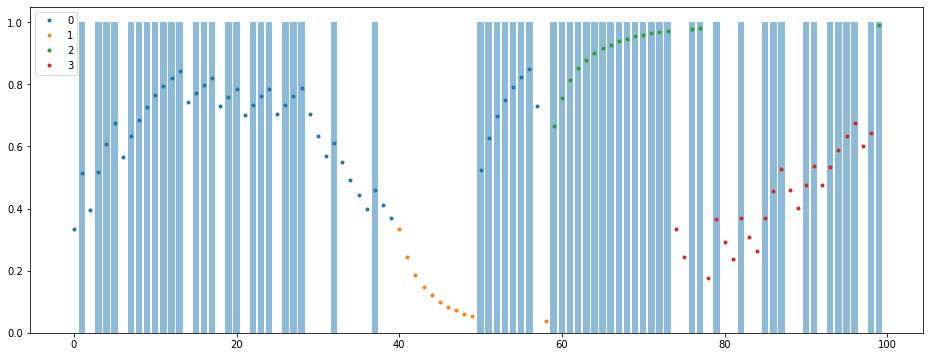

In [283]:
beta_, count, mem_choice, mem_q = simple_vol_change_detection_leak(data, v=0.1, leak=0.9)
plt.figure(figsize=(16,6))
plt.bar(range(len(data)),data, alpha=.5)
for k in range(len(beta_)):
    axe = np.where(np.array(mem_choice) == k)[0]
    plt.plot(axe, np.array(mem_q)[axe],'.', label=k)
plt.legend()

In [284]:
beta_

{0: {0: 0.023145774636694524, 1: 0.06280513945685437},
 1: {0: 0.048867121832364045, 1: 0.001996678111016037},
 2: {0: 0.014780882941434608, 1: 1.7149675968060774},
 3: {0: 2.959923923980887, 1: 5.350441013219931}}